In [1]:
import os
import sys
import librosa
from asteroid.losses import multisrc_neg_sisdr
import json 
import torch
import numpy as np

In [20]:
dirs = ['cv', 'tr', 'tt']
root_path = '/home/photon/MyGraduationProject/local/lrs3/'
for _dir in dirs:
    path = root_path + _dir
    jsons_file = [path + '/' + file for file in ['mix.json', 's1.json', 's2.json']]
    mix = json.load(open(jsons_file[0], 'r'))
    s1 = json.load(open(jsons_file[1], 'r'))
    s2 = json.load(open(jsons_file[2], 'r'))


In [21]:
def parse_file(filepath):
    filepaths = filepath.split('/')[1:]
    all_paths = ['/' + '/'.join(filepaths[:-2]) + '/' + _type + '/' + filepaths[-1] for _type in ['mix', 's1', 's2']]
    return all_paths

sisdrs = []
for file in mix:
    _mix, _s1, _s2 = parse_file(file[0])
    (mix_source, _), (s1_source, _), (s2_source, _) = librosa.load(_mix), librosa.load(_s1), librosa.load(_s2)
    mixtures = np.stack([mix_source, mix_source]).reshape(2, 1, -1).astype(np.float32)
    ests = np.stack([s1_source, s2_source]).reshape(2, 1, -1).astype(np.float32)
    mixtures = torch.from_numpy(mixtures)
    ests = torch.from_numpy(ests)
    
    sisdrs.append(multisrc_neg_sisdr(ests, mixtures).numpy())

KeyboardInterrupt: 

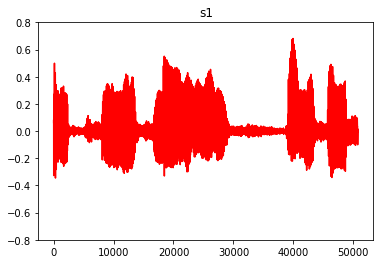

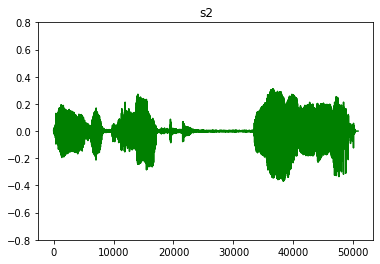

(-0.8, 0.8)

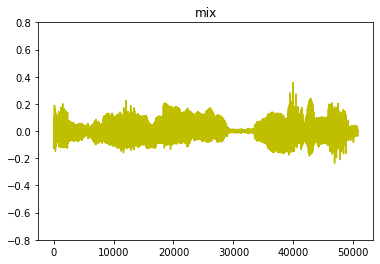

In [22]:
import matplotlib.pyplot as plt
plt.plot(s1_source, c='r')
plt.ylim(-0.8, 0.8)
plt.title('s1')
plt.show()
plt.plot(s2_source, c='g')
plt.ylim(-0.8, 0.8)
plt.title('s2')
plt.show()
plt.plot(mix_source, c='y')
plt.title('mix')
plt.ylim(-0.8, 0.8)

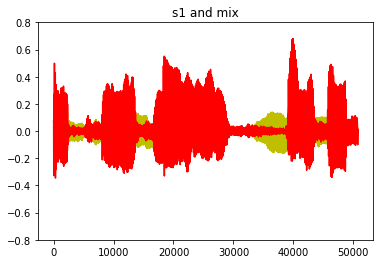

In [23]:
plt.plot(mix_source, c='y')
plt.plot(s1_source, c='r')
plt.ylim(-0.8, 0.8)
plt.title('s1 and mix')
plt.show()

In [26]:
from asteroid.losses import pairwise_neg_sisdr
pairwise_neg_sisdr(torch.from_numpy(s2_source.reshape(1, 1, -1).astype(np.float32)), torch.from_numpy((mix_source).reshape(1, 1, -1).astype(np.float32)))

tensor([[[0.2058]]])

In [28]:
np.array(sisdrs).mean(axis=0)

array([ 0.01727931, -0.01496934], dtype=float32)

In [29]:
from asteroid.losses import pairwise_neg_sisdr
pairwise_neg_sisdr(1*torch.from_numpy(s2_source.reshape(1, 1, -1).astype(np.float32)), torch.from_numpy((s1_source+1*s2_source).reshape(1, 1, -1).astype(np.float32)))

tensor([[[10.1417]]])

In [99]:
np.mean(sisdrs)

0.0020548515

In [18]:
librosa.output.write_wav

AttributeError: module 'librosa' has no attribute 'output'